In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# расписание 915 на Новочерёмушкинской улице
a915={'05': ['41'],
      '06': ['00', '19', '38', '52'],
      '07': ['07','25','40','54'],
      '08': ['08','22','39','56'],
      '09': ['19','42'],
      '10': ['06','30','54'],
      '11': ['18','42'],
      '12': ['06','30','54'],
      '13': ['18','37','55'],
      '14': ['14','32','50'],
      '15': ['09','28','47'],
      '16': ['06','25','43'],
      '17': ['02','22','39','56'],
      '18': ['12','28','44'],
      '19': ['00','16','31','47'],
      '20': ['03','26','49'],
      '21': ['11','31','54'],
      '22': ['14','34','54'],
      '23': ['14','34','54'],
      '24': ['14','34','54']}

In [5]:
times=[]
for h, ms in a915.items():
    for m in ms:
        time=h+':'+m+':00'
        times.append(time)
times

['05:41:00',
 '06:00:00',
 '06:19:00',
 '06:38:00',
 '06:52:00',
 '07:07:00',
 '07:25:00',
 '07:40:00',
 '07:54:00',
 '08:08:00',
 '08:22:00',
 '08:39:00',
 '08:56:00',
 '09:19:00',
 '09:42:00',
 '10:06:00',
 '10:30:00',
 '10:54:00',
 '11:18:00',
 '11:42:00',
 '12:06:00',
 '12:30:00',
 '12:54:00',
 '13:18:00',
 '13:37:00',
 '13:55:00',
 '14:14:00',
 '14:32:00',
 '14:50:00',
 '15:09:00',
 '15:28:00',
 '15:47:00',
 '16:06:00',
 '16:25:00',
 '16:43:00',
 '17:02:00',
 '17:22:00',
 '17:39:00',
 '17:56:00',
 '18:12:00',
 '18:28:00',
 '18:44:00',
 '19:00:00',
 '19:16:00',
 '19:31:00',
 '19:47:00',
 '20:03:00',
 '20:26:00',
 '20:49:00',
 '21:11:00',
 '21:31:00',
 '21:54:00',
 '22:14:00',
 '22:34:00',
 '22:54:00',
 '23:14:00',
 '23:34:00',
 '23:54:00',
 '24:14:00',
 '24:34:00',
 '24:54:00']

In [10]:
def get_seconds(time_str):
    # split in hh, mm, ss
    hh, mm, ss = time_str.split(':')
    return int(hh) * 3600 + int(mm) * 60 + int(ss)

seconds=[get_seconds(t) for t in times]
minutes=[get_seconds(t)//60 for t in times]
minutes

[341,
 360,
 379,
 398,
 412,
 427,
 445,
 460,
 474,
 488,
 502,
 519,
 536,
 559,
 582,
 606,
 630,
 654,
 678,
 702,
 726,
 750,
 774,
 798,
 817,
 835,
 854,
 872,
 890,
 909,
 928,
 947,
 966,
 985,
 1003,
 1022,
 1042,
 1059,
 1076,
 1092,
 1108,
 1124,
 1140,
 1156,
 1171,
 1187,
 1203,
 1226,
 1249,
 1271,
 1291,
 1314,
 1334,
 1354,
 1374,
 1394,
 1414,
 1434,
 1454,
 1474,
 1494]

In [18]:
timedeltas=[0]
for i in range(1, len(minutes)):
    td=minutes[i]-minutes[i-1]
    timedeltas.append(td)


In [17]:
print(len(minutes), len(timedeltas))

61 61


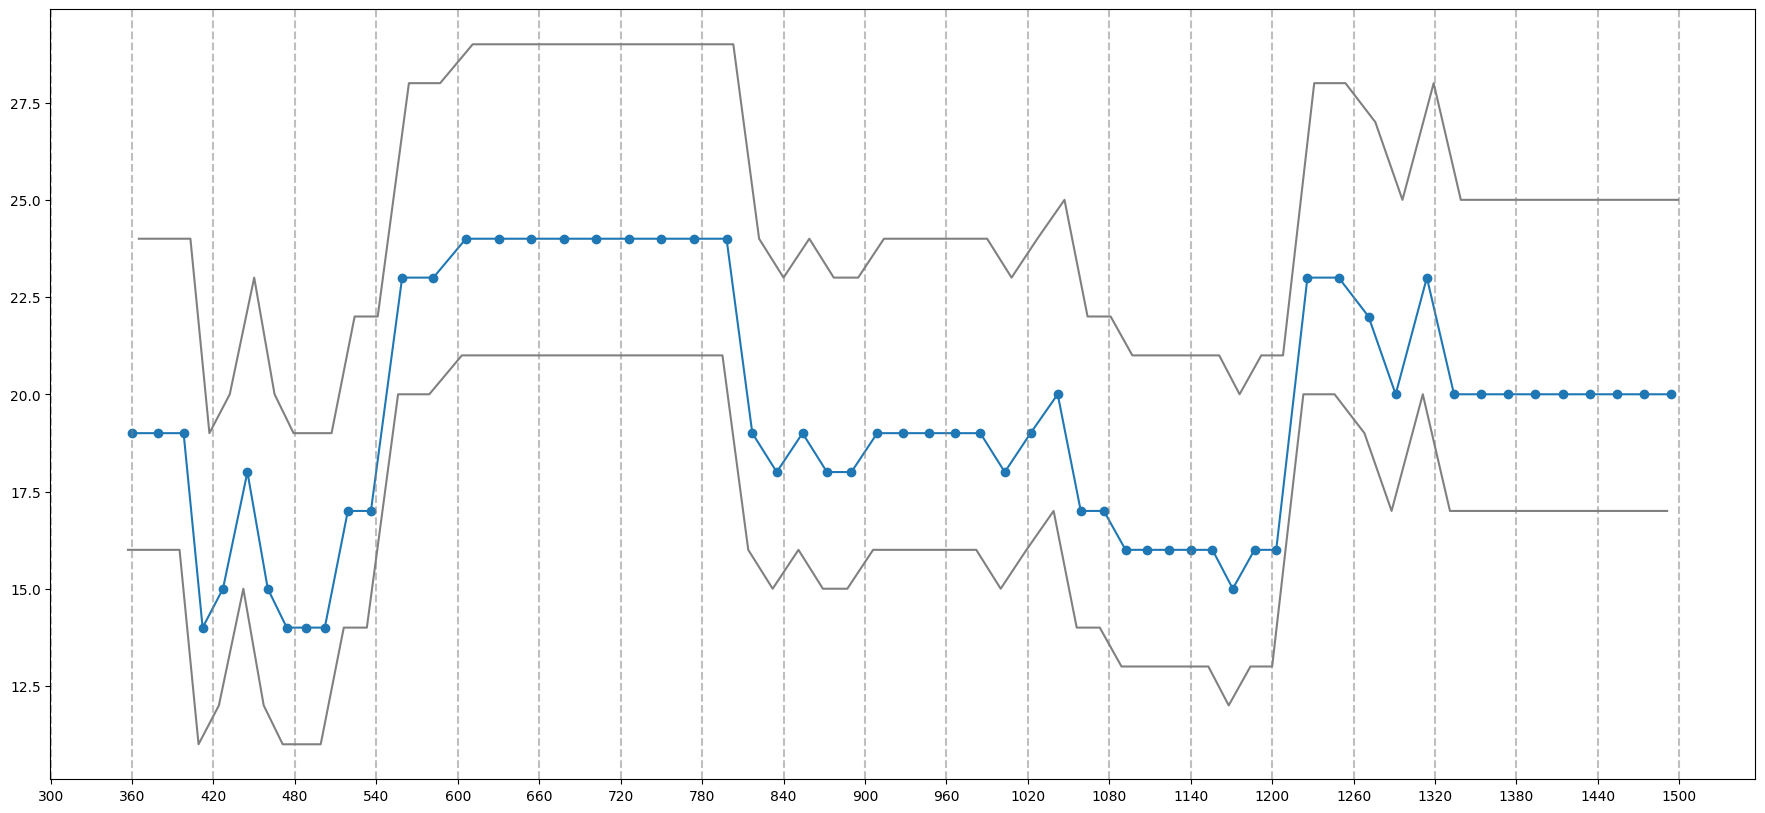

In [ ]:
arrival_threshold=-3 # допуск по раннему прибытию
departure_threshold=5 # допуск по опозданию
plt.figure(figsize=(22, 10))
ax = plt.axes()
ax.plot(minutes[1:], timedeltas[1:]) # ломаная точных прибытий
ax.plot([m+arrival_threshold for m in minutes][1:], [td+arrival_threshold for td in timedeltas][1:], color='grey') # ломаная ранних прибытий
ax.plot([m+departure_threshold for m in minutes][1:], [td+departure_threshold for td in timedeltas][1:], color='grey') # ломаная поздних прибытий
ax.scatter(minutes[1:], timedeltas[1:])

ax.set_xticks(list(range(300, 1440+60*2, 60)))
for t in range(300, 1440+2*60, 60):
    plt.axvline(t, linestyle='--', color='grey', alpha=0.5)
plt.show()